In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [4]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [5]:
df

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,100.00
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,12.00
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,10.00
4,C1,C1P1,B1,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,999.00
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,500.00
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,450.00
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,120.00
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,60.00
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,300.00


In [6]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [7]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
X

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0
3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
4,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0
5,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1
7,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1
8,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1
9,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1
11,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1
12,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [12]:
y = df['Perda30']

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

<br>
## RandomForest

In [14]:
steps = [('scaler', StandardScaler()),(('rf', RandomForestClassifier(n_estimators=200, max_features=8, max_depth=12)))]
pipeline = Pipeline(steps)

In [15]:
random_scaled = pipeline.fit(X_train, y_train)

In [16]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.6949152542372882

In [17]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

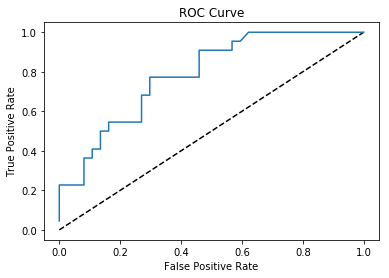

In [18]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred_prob)

0.7843980343980343

[[34  3]
 [15  7]]
Confusion matrix, without normalization


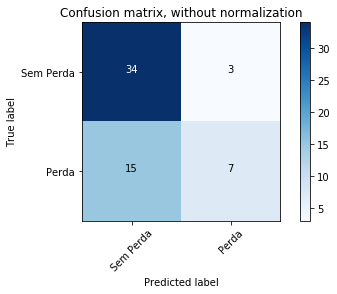

In [20]:
print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.92      0.79        37
          1       0.70      0.32      0.44        22

avg / total       0.70      0.69      0.66        59



## Fine-tunning the model.

In [22]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [23]:
# parameters = {'n_estimators' : [500, 525,550],
#              'min_samples_split': np.arange(2, 5),
#              'max_features': ['auto', 'sqrt', 'log2'],
#              'max_depth' : [4,5,6,7,8],
#              'bootstrap': [True,False],
#              'warm_start': [True,False],
#              'criterion' :['gini', 'entropy']
#              }
# cv = GridSearchCV(rf, param_grid=parameters, verbose=3, n_jobs=-1, cv=5)
#               #"max_depth": np.arange(1, 50),
#               #"max_features": [1, 3, 10],
              
#               #"min_samples_leaf": np.arange(1, 10),
              
#               #"criterion": ["gini", "entropy"]

In [24]:
# cv.fit(X_train, y_train);

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 54.9min finished


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.1s 
<br>[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
<br>[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
<br>[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
<br>[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.2min
<br>[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.8min
<br>[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 16.1min
<br>[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 21.0min
<br>[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.4min
<br>[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 32.3min
<br>[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 39.0min
<br>[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 46.5min
<br>[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 54.9min finished

In [39]:
# print(cv.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 525, 'warm_start': True}


In [26]:
# final_model =cv.best_estimator_

In [27]:
# final_model

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

### Best Model Result
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

In [ ]:
final_model = RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

## Predicting the Classes in Trainning Set

In [28]:
y_pred = final_model.predict(X_train)


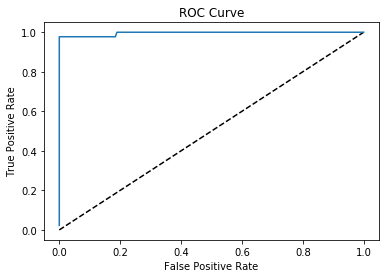

In [29]:
y_pred_prob = final_model.predict_proba(X_train)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:
roc_auc_score(y_train, y_pred_prob)

0.9957535885167463

In [31]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print(cv_scores)

[0.77 0.85 0.79 0.85 0.87]


Confusion matrix, without normalization


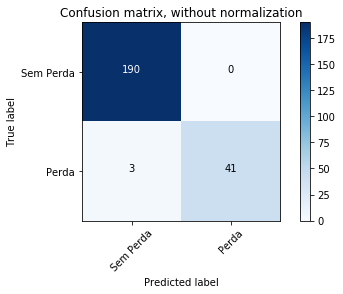

In [32]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [33]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       190
          1       1.00      0.93      0.96        44

avg / total       0.99      0.99      0.99       234



## Predicting the Classes in Test Set

In [34]:
y_pred = final_model.predict(X_test)


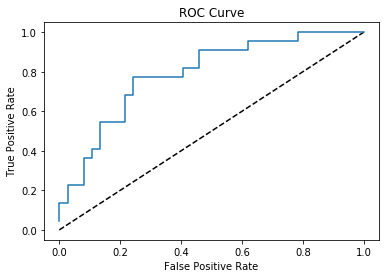

In [35]:
y_pred_prob = final_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
roc_auc_score(y_test, y_pred_prob)

0.7874692874692875

Confusion matrix, without normalization


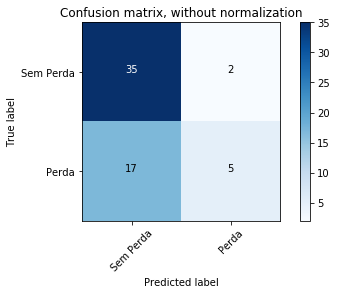

In [37]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.95      0.79        37
          1       0.71      0.23      0.34        22

avg / total       0.69      0.68      0.62        59

